# Old Strategy

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def word_counts(txt_file):
    with open(txt_file, "r") as f:
        phrases = np.array(f.readlines())

    # remove newline characters from each phrase
    for index, phrase in enumerate(phrases):
        phrases[index] = phrase.split("\n")[0]

    vectorizer = CountVectorizer()
    vectors = vectorizer.fit_transform(phrases)
    words = vectorizer.get_feature_names()
    
    words_with_counts = list(zip(words, vectors.toarray()[0]))
    # remove years and useless words like "the" and "in"
    words_with_counts = np.array([pair for pair in words_with_counts if not pair[0][0].isdigit() and pair[1] < 145])

    return words_with_counts

In [3]:
republican_train = word_counts("republicanPlatform.txt")
print(republican_train)

FileNotFoundError: [Errno 2] No such file or directory: 'republicanPlatform.txt'

In [4]:
democrat_train = word_counts("democratPlatform.txt")
print(democrat_train)

FileNotFoundError: [Errno 2] No such file or directory: 'democratPlatform.txt'

In [5]:
rdf = pd.DataFrame(republican_train, columns=["words", "republican_count"])
rdf["republican_count"] = rdf["republican_count"].astype(int)
ddf = pd.DataFrame(democrat_train, columns=["words", "democrat_count"])
ddf["democrat_count"] = ddf["democrat_count"].astype(int)
data = rdf.merge(ddf, how="inner", on="words")

data["percent_republican"] = data["republican_count"]/(data["democrat_count"]+data["republican_count"])
data

NameError: name 'republican_train' is not defined

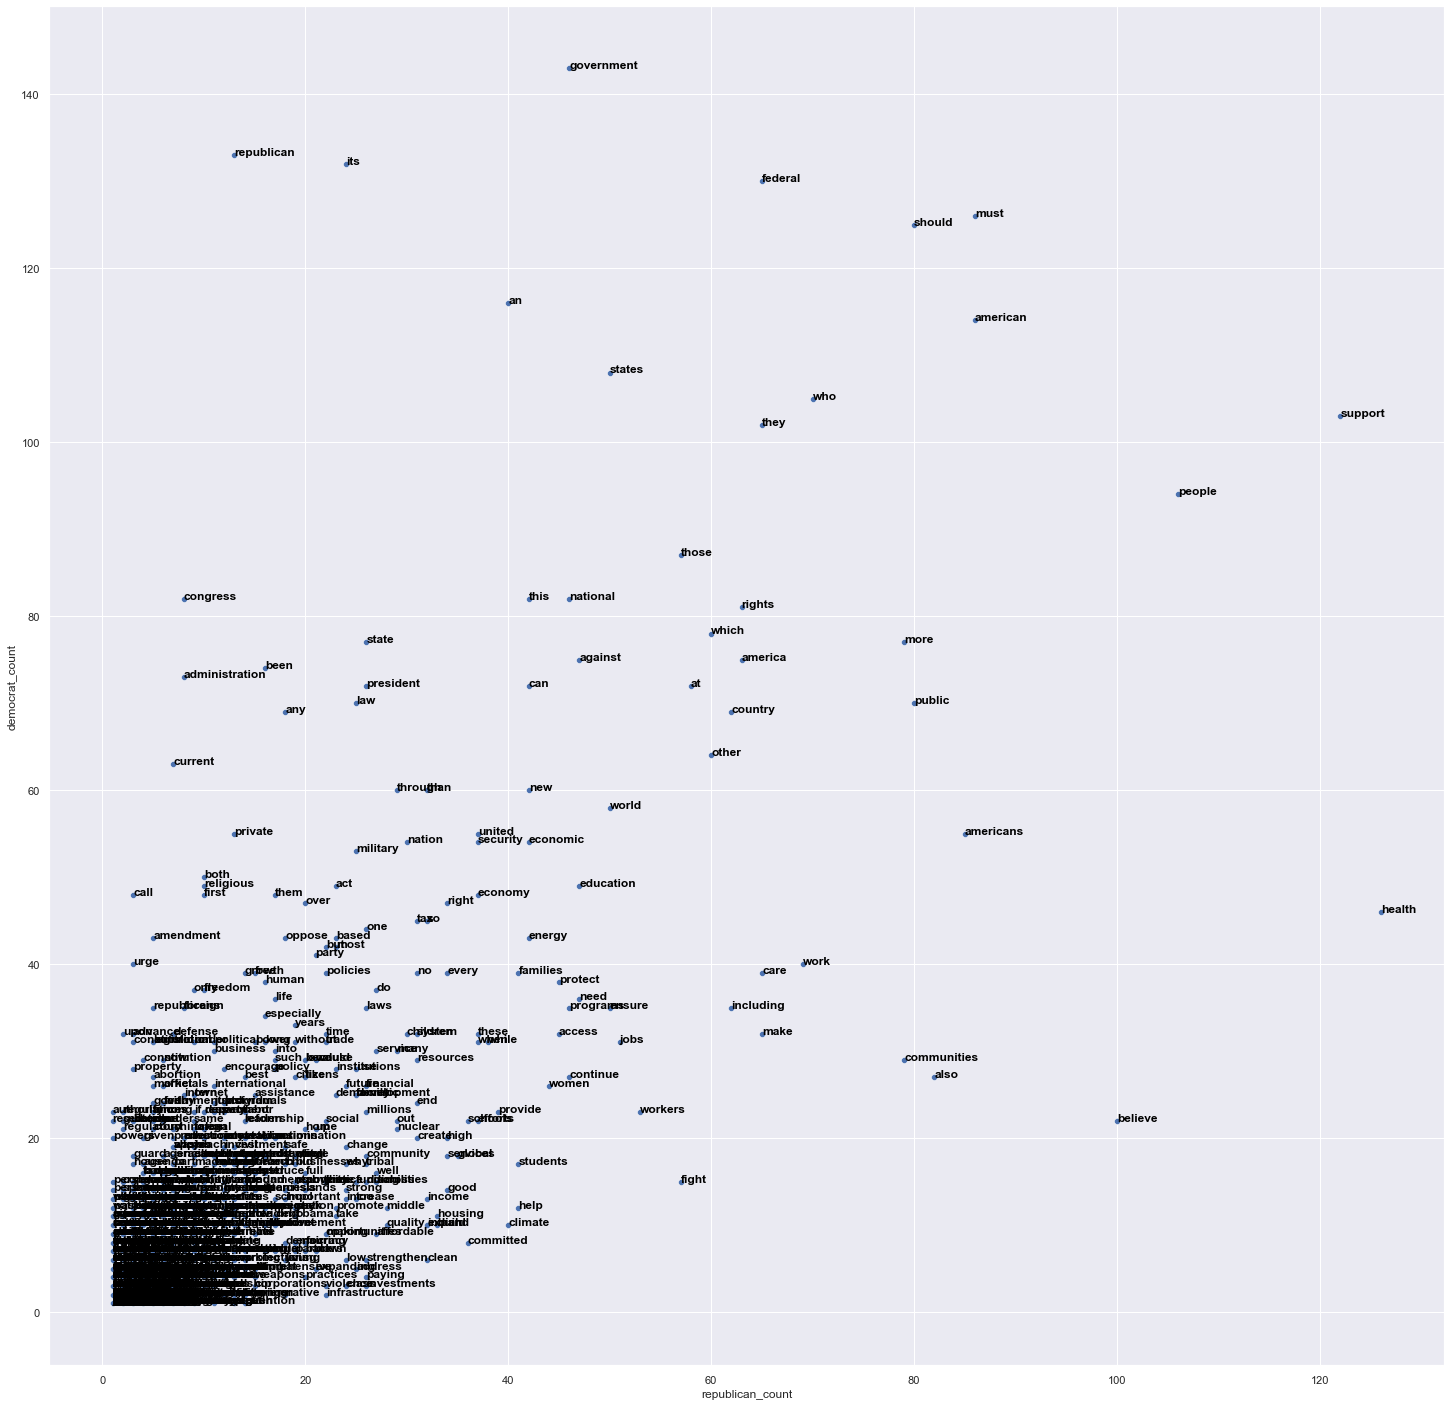

In [225]:
sns.set(rc={'figure.figsize':(25,25)})
word_scatter = sns.scatterplot(data=data, x="republican_count", y="democrat_count")

for line in range(0,data.shape[0]):
     word_scatter.text(data.republican_count[line]+0.01, data.democrat_count[line], data.words[line],
     horizontalalignment='left', size='medium', color='black', weight='semibold')

In [292]:
# Test model with random dataset
vectorizer = CountVectorizer()
mergedWords = [' '.join(data["words"].to_numpy())]
vectorizer.fit_transform(mergedWords)


random_tweet = "free healthcare is attainable"
mask = vectorizer.transform([random_tweet]).toarray()[0]
mask

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
data.set_index("words").T

words,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zekria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zero,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zeus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zombie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# New Strategy

In [ ]:
#NEW PLAN
# Get text with reddit api from conservative and liberal subreddits and store all texts in array
# mark if its republican or democrat in pandas dataframe
# Do countvectorizer on array to create each column in dataframe
# Train ml model on the x and y

# For user data, use original vectorizer to transform the dataset
# Use the array returned as input to the model
# Return value from model

# TODO LIST
# Visualization scatterplot (transpose and separate rep)
# Remove numbers from datasets
# Get new data from reddit so that there is an equal amount of liberal and conservative comments
# Feature engineering
# Logistic Regression Hyperparameter Tuning

In [67]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import praw
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os

In [11]:
reddit = praw.Reddit(
    client_id = os.getenv("REDDIT_CLIENT_ID"),
    client_secret = os.getenv("REDDIT_CLIENT_SECRET"),
    user_agent = "PoliticalAnalysis",
)

conservative_subreddit = reddit.subreddit("conservative")
liberal_subreddit = reddit.subreddit("liberal")

liberal_comments = []
conservative_comments = []

for submission in liberal_subreddit.hot(limit=50):
    for index, comment in enumerate(submission.comments):
        liberal_comments.append(comment.body)
        if index == 5:
            break
        
for submission in conservative_subreddit.hot(limit=50):
    for index, comment in enumerate(submission.comments):
        conservative_comments.append(comment.body)
        if index == 5:
            break

In [12]:
print(len(liberal_comments))
print(len(conservative_comments))

195
287


In [23]:
vectorizer = CountVectorizer()
rows = vectorizer.fit_transform(liberal_comments+conservative_comments).toarray()
feature_names = vectorizer.get_feature_names()

data = pd.DataFrame(data=rows, columns=feature_names)
data.iloc[0:5,:70]

,000,01,02,08,09,10,100,100k,10k,10x,...,63,7320,75,75000,80,86,90,90s,__,__because
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Create classification labels for conservatives and liberals that are the same length as their respective comment arrays
conservative_classifiers = np.full((len(conservative_comments), 1), "CONSERVATIVE")   # 1 for conservative
liberal_classifiers = np.full((len(liberal_comments), 1), "LIBERAL")           # 0 for liberal

# stack the two classifier arrays together to make one array and set it as a new column
data["Political_Party"] = np.vstack((conservative_classifiers, liberal_classifiers))
data.head()

,000,01,02,08,09,10,100,100k,10k,10x,...,your,yourself,youtube,yurop,zekria,zero,zeus,zombie,zuck,Political_Party
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CONSERVATIVE
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CONSERVATIVE
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CONSERVATIVE
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CONSERVATIVE
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CONSERVATIVE


# Train Model

In [53]:
X_data = data.drop("Political_Party", axis=1)
y_data = data["Political_Party"]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

regr = LogisticRegression()
regr.fit(X_train, y_train)

transformed_messages = vectorizer.transform(["We’re lucky to have Dr. Fauci.", "We helped Afghanistan in their first election by dying people’s finger purple to prevent vote fraud. Why isn’t that an option here? I mean that seriously. Anyone can and should be able to walk into any polling station and vote. Period. If there’s concern they would vote more than once dye their finger purple with a dye that has to wear off. Problem solved.", "It would be nice; but if there's one thing we've all learned over the last couple of decades, it's that there is no justice in this country any more. Nothing will happen to her or the Clinton Cronies."])
print(regr.predict(transformed_messages))
print(regr.predict_proba(transformed_messages))

['CONSERVATIVE' 'CONSERVATIVE' 'CONSERVATIVE']
[[0.81490514 0.18509486]
 [0.9599135  0.0400865 ]
 [0.55537311 0.44462689]]


# Check Model Accuracy

In [54]:
from sklearn.metrics import f1_score

transformed_test = vectorizer.transform(X_test).toarray()
yhat = regr.predict(X_test)
f1_score(y_test, yhat, average="weighted")

0.6069677430942204